<a href="https://colab.research.google.com/github/natdebandi/hate_speech_ar/blob/main/3_GPT_evaluate_bin_finetunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP final - reconocimiento de discursos discriminatorios en Twitter

Esta notebook se usa para recuperar los batch de GPT y evaluarlos en relación a los datos de test

**Natalia Dedandi**





La documentación de la API se encuentra aqui:

https://platform.openai.com/docs/api-reference/introduction



In [1]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.9/335.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
import json
from openai import OpenAI
import os
from google.colab import userdata
#seteo la KEY
os.environ['OPENAI_API_KEY'] = userdata.get('openIA_key')




In [ ]:
#creo el cliente OPENAI con mi usuario y proyecto
client = OpenAI(
  organization='org-1uHjwiaB3OlPzoxfVzhqOSzs',
  project='proj_2fII7izwVGgYaERNNKhhMx4l',
)

pRUEBAS BINARIAS

BATCH ID Prueba 1: batch_P0l0BWckYZI3eywp5i2EsT9F

BATCH ID Prueba 2: batch_gOkX3xcR4maDJN8sxd86kvmi



In [ ]:
batch_job = client.batches.retrieve('batch_P0l0BWckYZI3eywp5i2EsT9F')
status = batch_job.status
status

'completed'

In [ ]:
if status == "completed":

	output_file_id = batch_job.output_file_id
	# We should check that there are succesfull results
	# It could be the case that all responses are errors.
	if output_file_id:
		outputs = client.files.content(output_file_id).content
		result_file_name = "outputs.jsonl"

		with open(result_file_name, 'wb') as file:
		    file.write(outputs)

In [ ]:
import pandas as pd


data_results = []
with open(result_file_name, 'r') as file:
  for line in file:
      output = json.loads(line.strip())
      id=output["custom_id"]
      sentiment= output["response"]["body"]["choices"][0]["message"]["content"]
      data_results.append({'id': id, 'sentiment_gpt': sentiment})
      gpt_response = output["response"]["body"]["choices"][0]["message"]["content"]
      #print(gpt_response)

df_results = pd.DataFrame(data_results)

In [ ]:
df_results[0:10]

,id,sentiment_gpt
0,397703,Hateful
1,397704,No es un comentario odioso.
2,397705,El texto contiene un sentimiento de odio hacia...
3,397706,El texto tiene un tono de desdén y crítica hac...
4,397707,No hateful.
5,397708,Hateful
6,397709,Hateful
7,397710,El texto contiene un lenguaje despectivo y ofe...
8,397711,No es un mensaje de odio.
9,397712,"Lo siento, pero necesito más contexto o un tex..."


In [ ]:
df_results["id"] = pd.to_numeric(df_results["id"])

In [ ]:
#df_results.to_csv('outputs_bin_1.csv')

In [ ]:
df_results.groupby(['sentiment_gpt']).size()

sentiment_gpt
Aumentos a jubilados que aportaron toda su vida laboral. Además, se implementaron mejoras en los programas de salud destinados a jubilados, lo que garantiza un acceso más fácil a servicios médicos. También se establecieron beneficios fiscales adicionales para las pensiones, aumentando así el ingreso neto de muchos jubilados. Por último, se promovieron actividades recreativas y culturales para este sector de la población, fomentando su bienestar general.    1
Claro, puedo ayudarte con eso. Por favor, proporciona el texto que deseas que analice.                                                                                                                                                                                                                                                                                                                                                                                       1
Despreciable y lleno de odio.                               

In [ ]:
from datasets import load_dataset
import pandas as pd

ds1 = load_dataset("piuba-bigdata/contextualized_hate_speech")

In [ ]:
df_test = pd.DataFrame(ds1['test'])
df_test[1:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0


In [ ]:
#junto los dos dataframes
df_hateful=df_test.merge(df_results, on='id', how='left')

In [ ]:
df_hateful[0:10]

,id,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,sentiment_gpt
0,397703,Mora Godoy cierra su escuela de tango y remata...,@usuario Ojalá se funda y cague de hambre,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,Hateful
1,397704,Mora Godoy cierra su escuela de tango y remata...,@usuario Faltó que se enganchó al hijo de sofo...,Mora Godoy cierra su escuela de tango y remata...,1,Puede marcar con justeza la fecha de inicio de...,0,1,0,0,0,0,0,0,0,No es un comentario odioso.
2,397705,Mora Godoy cierra su escuela de tango y remata...,"@usuario y bue, que le vaya a llorar a Cristin...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,El texto contiene un sentimiento de odio hacia...
3,397706,Mora Godoy cierra su escuela de tango y remata...,@usuario @usuario Jodete. Macri te hizo conoce...,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,El texto tiene un tono de desdén y crítica hac...
4,397707,Mora Godoy cierra su escuela de tango y remata...,"@usuario Que se joda, es su gobierno el que el...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,No hateful.
5,397708,Mora Godoy cierra su escuela de tango y remata...,"@usuario Jajaajajajaaja que lástima!!! Anda, b...",Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,Hateful
6,397709,Mora Godoy cierra su escuela de tango y remata...,@usuario Que se joda,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,Hateful
7,397710,Mora Godoy cierra su escuela de tango y remata...,@usuario SEGUI VOTANDO AL PERONISMO PELOTUDA,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,El texto contiene un lenguaje despectivo y ofe...
8,397711,Mora Godoy cierra su escuela de tango y remata...,@usuario Paaaaaaaaaaaaabreeeee!_shoro😭😭🤧,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,No es un mensaje de odio.
9,397712,Mora Godoy cierra su escuela de tango y remata...,@usuario TUGO,Mora Godoy cierra su escuela de tango y remata...,0,Puede marcar con justeza la fecha de inicio de...,0,0,0,0,0,0,0,0,0,"Lo siento, pero necesito más contexto o un tex..."


In [ ]:
## ajustar los valores y crear una variable binaria entera 1 y 0
df_hateful['sentiment_bin'] = df_hateful['sentiment_gpt'].apply(lambda x: 1 if (x == 'odioso' or x=='hateful' or x=='Hateful' or x=='odioso.') else 0)
df_hateful.groupby(['sentiment_bin']).size()

sentiment_bin
0    9417
1    1926
dtype: int64

<ipython-input-80-4d697c4524f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')


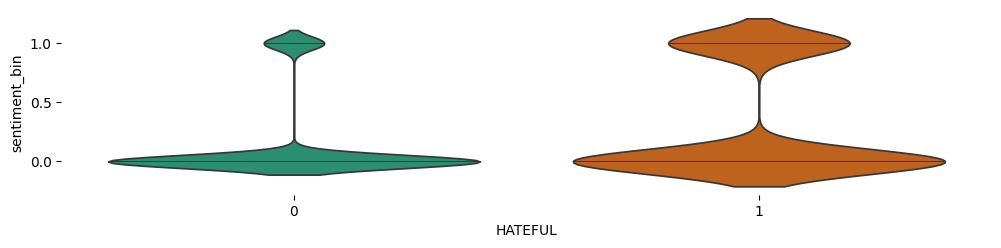

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_hateful['sentiment_bin'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_hateful, x='HATEFUL', y='sentiment_bin', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def compare_model_predictions(y_true, y_pred, problem_type='classification'):
    metrics = {}

    if problem_type == 'classification':
        metrics['Accuracy'] = accuracy_score(y_true, y_pred)
        metrics['Precision'] = precision_score(y_true, y_pred, average='weighted')
        metrics['Recall'] = recall_score(y_true, y_pred, average='weighted')
        metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
        print('metrix')
        print(metrics)

In [ ]:
metrics=compare_model_predictions(df_hateful['HATEFUL'],df_hateful['sentiment_bin'])

metrix
{'Accuracy': 0.7756325487084546, 'Precision': 0.7820684033352095, 'Recall': 0.7756325487084546, 'f1': 0.7787565014472516}
